In [ ]:
import scipy.io
import matplotlib.pyplot as plt
from scipy.special import expit
import numpy as np
%matplotlib inline

In [ ]:
mat = scipy.io.loadmat('ejemplo_regresion.mat')
x = mat.get('x')
y = mat.get('y')
t = mat.get('t')
consumo_mat = scipy.io.loadmat('consumoDB.mat')
hrsignal_mat = scipy.io.loadmat('HRsignal.mat')

In [ ]:
plt.figure
plt.plot(x, t, '*g')
plt.plot(x, y, '-r')

In [ ]:
consumo_x = consumo_mat.get('x')
consumo_t = consumo_mat.get('t')
plt.figure
plt.plot(consumo_x, consumo_t, '*g')

In [ ]:
M = 18

In [155]:
def expFunction(x, miu, s):
    return np.exp(-(x - miu)/(2*s*s))

def BFunction(xi, M, Fbase):
    phiXn = np.zeros(M)
    idP = np.linspace(0, M - 1, M)
    #fixed s 
    s = 2
    if(Fbase == 'poly'):
        phiXn = np.power(xi, idP)
    if(Fbase == 'exp'):
        phiXn = expFunction(xi, idP, s)
    if(Fbase == 'sigmod'):
        a = (xi - idP) / s
        phiXn = expit(a)
    return phiXn


def MBFunction(x_vect, M, Fbase):
    N = np.size(x_vect)
    PHIX = np.zeros([N,M])
    for i in range(0,N):
        PHIX[i,:] = BFunction(x_vect[i],M,Fbase)
    return PHIX

def calcYEst(mPHIX, t):
    mPHIXT = mPHIX.T
    mPHIXT_pw2_inv = np.linalg.pinv(mPHIXT@mPHIX)
    w_ml = mPHIXT_pw2_inv@(mPHIXT@t)
    return mPHIX.dot(w_ml)

In [127]:
M=11
mPHIX = MBFunction(consumo_x, M, 'poly')
yEst = calcYEst(mPHIX, consumo_t)

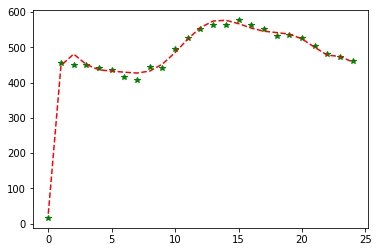

In [128]:
plt.plot(consumo_x, consumo_t, '*g')
plt.plot(consumo_x, yEst, '--r')

In [156]:
M=18
mPHIX = MBFunction(consumo_x, M, 'sigmod')
yEst = calcYEst(mPHIX, consumo_t)

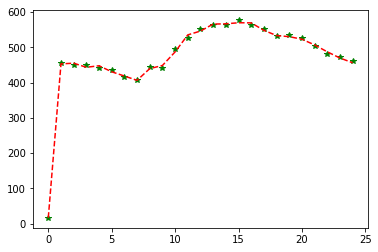

In [157]:
plt.plot(consumo_x, consumo_t, '*g')
plt.plot(consumo_x, yEst, '--r')

In [83]:
M=15
mPHIX = MBFunction(consumo_x, M, 'exp')
yEst = calcYEst(mPHIX, consumo_t)

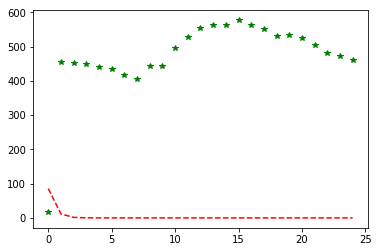

In [84]:
plt.plot(consumo_x, consumo_t, '*g')
plt.plot(consumo_x, yEst, '--r')

(6528, 1)

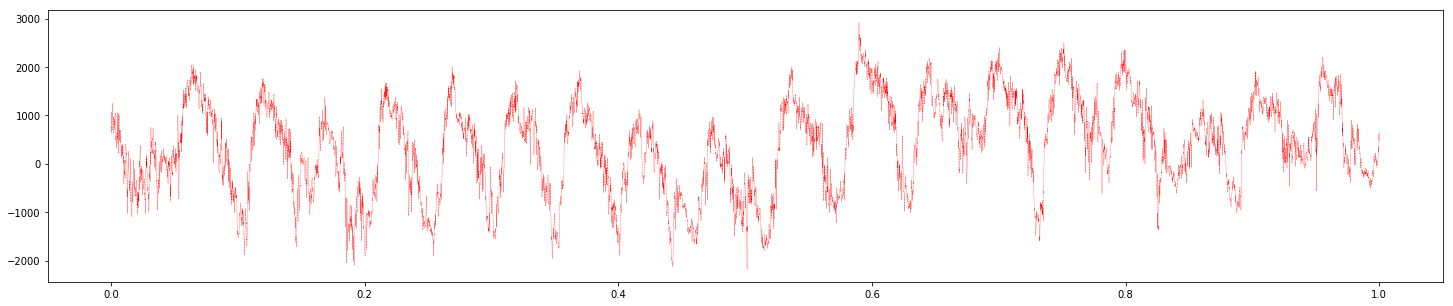

In [129]:
hrsignal_mat = scipy.io.loadmat('HRsignal.mat')
hr_t = hrsignal_mat.get('HR')
hr_x = hrsignal_mat.get('x').T

plt.figure(figsize=(25,5))
plt.plot(hr_x, hr_t,  linestyle='--' , linewidth=0.3, color='red')
hr_t.shape

In [ ]:
M=5000
mPHIX = MBFunction(hr_x, M, 'poly')
yEst = calcYEst(mPHIX, hr_t)

plt.plot(hr_x, hr_t, '-.g')
plt.plot(hr_x, yEst, '--r')

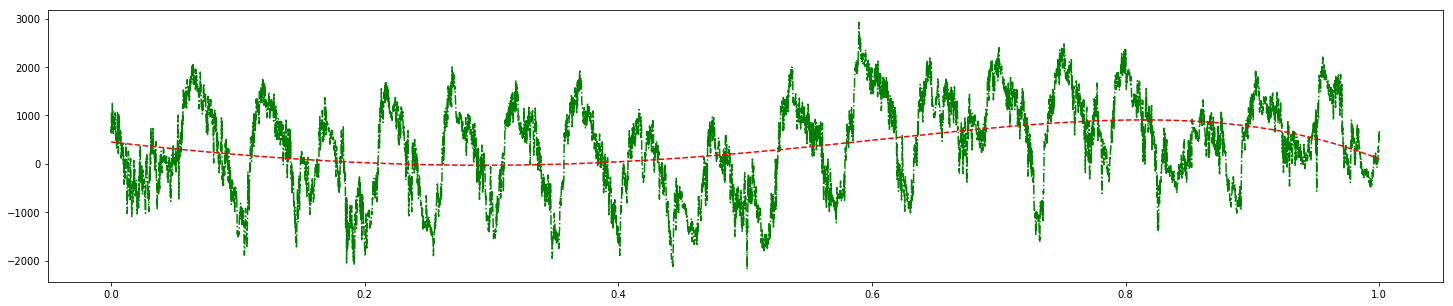

In [158]:
M=100
mPHIX = MBFunction(hr_x, M, 'sigmod')
yEst = calcYEst(mPHIX, hr_t)
plt.figure(figsize=(25,5))
plt.plot(hr_x, hr_t, '-.g')
plt.plot(hr_x, yEst, '--r')